https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/logistic_regression/main.py#L33-L34

In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [4]:
from matplotlib import pyplot as plt

In [5]:
# Hyper-parameters 
input_size = 28 * 28    # 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# 1 Этап - Данные

In [6]:
# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

100.0%


Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw



100.0%


Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



100.0%


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw



100.0%

Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw


In [7]:
len(train_dataset)

60000

In [8]:
x, y = train_dataset[0]

In [9]:
x.shape

torch.Size([1, 28, 28])

In [10]:
y

5

In [11]:
x.flatten().shape

torch.Size([784])

In [12]:
x.reshape(-1).shape

torch.Size([784])

In [13]:
x.squeeze().shape

torch.Size([28, 28])

In [14]:
y

5

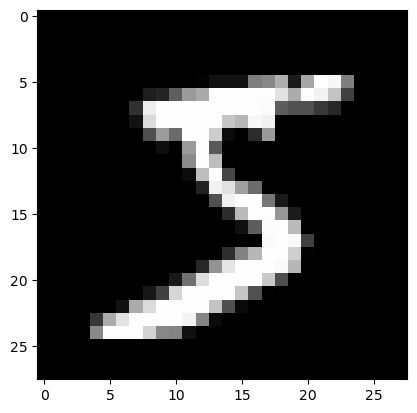

In [15]:
plt.imshow(x.squeeze(), cmap='gray')

In [16]:
for images, labels in train_loader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([100, 1, 28, 28])
torch.Size([100])


# 2 этап - Нейронная сеть

In [17]:
# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [18]:
model

Linear(in_features=784, out_features=10, bias=True)

In [19]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[ 2.9733e-02, -1.4409e-02,  3.7584e-05,  ...,  3.3687e-02,
         -2.7200e-02,  7.7713e-03],
        [ 1.6667e-02,  3.3395e-02,  6.6620e-03,  ..., -2.1240e-02,
          1.9571e-02, -1.3116e-02],
        [ 2.0366e-02, -3.0789e-02, -1.2969e-02,  ..., -1.6900e-03,
          3.2953e-02,  4.9052e-03],
        ...,
        [ 3.2492e-02,  1.7874e-02,  3.1083e-02,  ...,  4.5087e-03,
         -1.3555e-02,  4.9333e-03],
        [-2.3796e-02, -2.6009e-03,  1.3224e-02,  ...,  3.4011e-02,
          1.2087e-02, -3.0064e-02],
        [ 3.5299e-02, -1.4260e-02,  1.2264e-02,  ..., -1.2365e-02,
          1.1203e-02, -1.6609e-02]], requires_grad=True)
Parameter containing:
tensor([-0.0013,  0.0190, -0.0298,  0.0249,  0.0230,  0.0073, -0.0313,  0.0293,
        -0.0206,  0.0182], requires_grad=True)


In [20]:
model.weight.data

tensor([[ 2.9733e-02, -1.4409e-02,  3.7584e-05,  ...,  3.3687e-02,
         -2.7200e-02,  7.7713e-03],
        [ 1.6667e-02,  3.3395e-02,  6.6620e-03,  ..., -2.1240e-02,
          1.9571e-02, -1.3116e-02],
        [ 2.0366e-02, -3.0789e-02, -1.2969e-02,  ..., -1.6900e-03,
          3.2953e-02,  4.9052e-03],
        ...,
        [ 3.2492e-02,  1.7874e-02,  3.1083e-02,  ...,  4.5087e-03,
         -1.3555e-02,  4.9333e-03],
        [-2.3796e-02, -2.6009e-03,  1.3224e-02,  ...,  3.4011e-02,
          1.2087e-02, -3.0064e-02],
        [ 3.5299e-02, -1.4260e-02,  1.2264e-02,  ..., -1.2365e-02,
          1.1203e-02, -1.6609e-02]])

In [21]:
model.bias.data

tensor([-0.0013,  0.0190, -0.0298,  0.0249,  0.0230,  0.0073, -0.0313,  0.0293,
        -0.0206,  0.0182])

In [22]:
x = torch.randn(784)
model(x)

tensor([-0.7304, -0.0399,  1.1530,  0.2436,  0.1724, -0.7597,  0.3548, -0.4777,
        -0.1566, -1.0661], grad_fn=<AddBackward0>)

In [23]:
x, y = train_dataset[0]
model(x.flatten())

tensor([-0.0473, -0.0315, -0.0604, -0.1371,  0.0490,  0.0432, -0.3357, -0.0908,
         0.1679,  0.2371], grad_fn=<AddBackward0>)

# 3 этап - Оптимизация и лосс-функция

In [24]:
# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# 4 этап - Обучение

In [25]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 1.0465
Epoch [1/5], Step [200/600], Loss: 0.6034
Epoch [1/5], Step [300/600], Loss: 1.2325
Epoch [1/5], Step [400/600], Loss: 0.7964
Epoch [1/5], Step [500/600], Loss: 0.9386
Epoch [1/5], Step [600/600], Loss: 1.3352
Epoch [2/5], Step [100/600], Loss: 0.6230
Epoch [2/5], Step [200/600], Loss: 1.1684
Epoch [2/5], Step [300/600], Loss: 1.2050
Epoch [2/5], Step [400/600], Loss: 0.7395
Epoch [2/5], Step [500/600], Loss: 0.4120
Epoch [2/5], Step [600/600], Loss: 1.6627
Epoch [3/5], Step [100/600], Loss: 0.4012
Epoch [3/5], Step [200/600], Loss: 1.2042
Epoch [3/5], Step [300/600], Loss: 0.6284
Epoch [3/5], Step [400/600], Loss: 1.4594
Epoch [3/5], Step [500/600], Loss: 0.6276
Epoch [3/5], Step [600/600], Loss: 1.6082
Epoch [4/5], Step [100/600], Loss: 1.0628
Epoch [4/5], Step [200/600], Loss: 1.0114
Epoch [4/5], Step [300/600], Loss: 0.9685
Epoch [4/5], Step [400/600], Loss: 1.1903
Epoch [4/5], Step [500/600], Loss: 1.7423
Epoch [4/5], Step [600/600], Loss:

In [26]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
#with torch.no_grad():
correct = 0
total = 0
for images, labels in test_loader:
    images = images.reshape(-1, input_size)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the model on the 10000 test images: 89.31999969482422 %
